In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#Defining all dataframes
df_PA = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
df_EDV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
df_AV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
df_RR = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_D = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
df_P = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")
df_EDU = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDUnique")

Q4. Display data by splitting age in 4 quartiles and labeling the quartiles.

In [91]:
from datetime import date
#calculate the dates difference to get the age
df = pd.DataFrame(data = df_PA["DateOfBirth"])
def age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
  
df['Age'] = df['DateOfBirth'].apply(age)
df

,DateOfBirth,Age
0,1960-01-01 00:00:00.000000,62
1,1985-11-15 02:08:42.089852,36
2,1976-04-15 02:52:09.762384,46
3,1968-10-15 03:32:13.634776,53
4,1962-05-01 19:12:58.949547,60
...,...,...
940,1986-05-26 00:01:19.761035,36
941,1970-06-10 21:41:03.814278,52
942,1983-01-08 21:49:27.883969,39
943,1963-06-05 07:57:05.569185,59


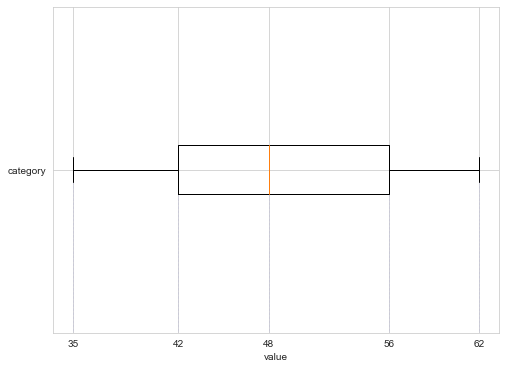

In [92]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

ax.boxplot(df["Age"], vert=False, manage_ticks=True)
ax.set_xlabel('value')
ax.set_xticks([15])

ax.set_yticks([1])
ax.set_yticklabels(['category'])

quantiles = np.quantile(df["Age"],[0,0.25,0.5,0.75,1])
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, label = 'quantiles',
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, 1.5)
ax.set_xticks(quantiles)
plt.show()

Q5. Display full name of patients who are born in 1986.

In [94]:
df.temp = df_PA.set_index(["DateOfBirth"])
df1 = df_temp.loc["1986"]
df1[["FirstName", "LastName"]]

,FirstName,LastName
DateOfBirth,,
1986-05-31 09:36:05.715918,Gabriel,Joseph
1986-07-24 17:36:00.791027,Lincoln,Brenda
1986-11-26 10:44:22.627622,Ala,Halpert
1986-01-08 02:34:04.595766,Lolita,Darci
1986-05-29 00:35:58.693977,Fadel,Bernardt
1986-02-11 06:22:40.733949,Bentley,Kippax
1986-04-15 00:49:58.689775,Vale,Olanda
1986-11-19 23:50:47.954773,Britt,Dureden
1986-07-10 16:27:30.640009,Cristabel,Chatel


Q6. Create a jointplot on expected mortality & expected length of stay.

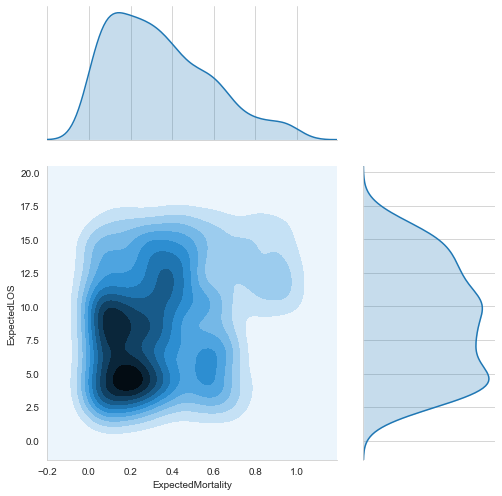

In [95]:
sns.jointplot(data=df_RR, x='ExpectedMortality',y='ExpectedLOS', kind ="kde", height = 7, ratio = 2)

Q16. Plot a graph to show the distribution of expected length of stay.

<AxesSubplot:xlabel='ExpectedLOS'>

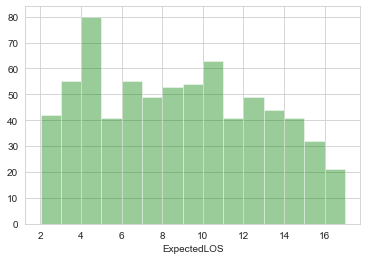

In [96]:
sns.set_style('whitegrid')
sns.distplot(df_RR['ExpectedLOS'],kde=False, color='green', bins=15)

distribution shows the maximum occurances is between 4 to 5 and then 10 to 11.

Q17. Create a heat map to show the correlation between the column values of Edvisits.

In [97]:
tc=df_EDV.corr(method='pearson')
tc

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


<AxesSubplot:>

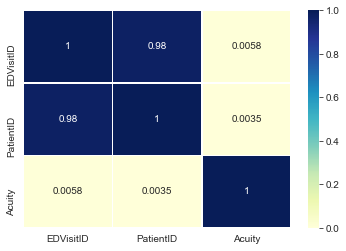

In [98]:
sns.heatmap(tc,annot=True,vmin=0, vmax=1, cmap="YlGnBu", linewidths=.5)

Q18. Add column 'Age' in Patient table.

In [99]:
from datetime import date
df = pd.DataFrame(data = df_PA["DateOfBirth"])
def age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
  
df_PA['Age'] = df_PA['DateOfBirth'].apply(age)
df_PA

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000000,Male,White,English,62
1,2,Far,Myers,1985-11-15 02:08:42.089852,Male,White,English,36
2,3,Devlin,Michael,1976-04-15 02:52:09.762384,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.634776,Male,White,English,53
4,5,Tann,Bama,1962-05-01 19:12:58.949547,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761035,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814278,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.883969,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569185,Male,Black/African-American,English,59
